In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

merged_data = pd.merge(ride_data, city_data,on='city', how='left')
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


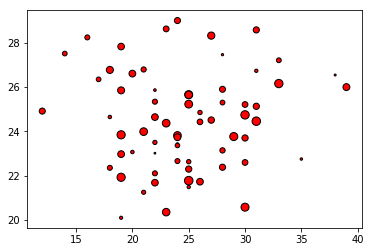

In [4]:
urban_data = merged_data.loc[merged_data['type']== 'Urban', :]
urban_data_by_city = urban_data.groupby('city')

urban_avg_fare= urban_data_by_city.mean()
urban_avg_fare= urban_avg_fare['fare']
urban_num_rides = urban_data_by_city.count()
urban_num_rides = urban_num_rides['ride_id']
driver_count = urban_data_by_city.mean()
driver_count =driver_count['driver_count']
# urban_avg_fare
# urban_num_rides

urban_scatter =plt.scatter(urban_num_rides, urban_avg_fare, marker='o', facecolors='red', edgecolors='black',s = driver_count, alpha=1)


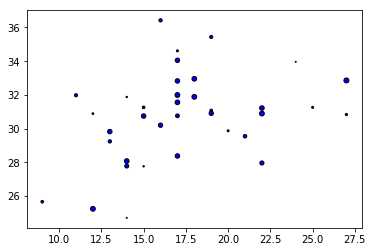

In [5]:
suburban_data = merged_data.loc[merged_data['type']== 'Suburban', :]
suburban_data_by_city = suburban_data.groupby('city')

suburban_avg_fare= suburban_data_by_city.mean()
suburban_avg_fare= suburban_avg_fare['fare']
suburban_num_rides = suburban_data_by_city.count()
suburban_num_rides = suburban_num_rides['ride_id']
sub_driver_count = suburban_data_by_city.mean()
sub_driver_count =sub_driver_count['driver_count']

suburban_scatter =plt.scatter(suburban_num_rides, suburban_avg_fare, marker='o', facecolors='blue', edgecolors='black',s = sub_driver_count, alpha=1)



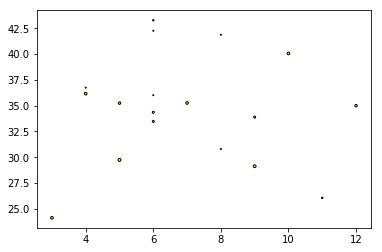

In [6]:
rural_data = merged_data.loc[merged_data['type']== 'Rural', :]
rural_data_by_city = rural_data.groupby('city')

rural_avg_fare= rural_data_by_city.mean()
rural_avg_fare= rural_avg_fare['fare']
rural_num_rides = rural_data_by_city.count()
rural_num_rides = rural_num_rides['ride_id']
rural_driver_count = rural_data_by_city.mean()
rural_driver_count =rural_driver_count['driver_count']

rural_scatter =plt.scatter(rural_num_rides, rural_avg_fare, marker='o', facecolors='yellow', edgecolors='black',s = rural_driver_count, alpha=1)



# Bubble Plot of Ride Sharing Data

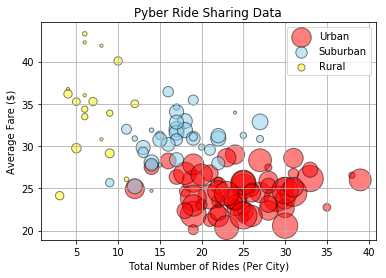

In [7]:
urban_scatter =plt.scatter(urban_num_rides, urban_avg_fare, marker='o', facecolors='red', edgecolors='black',s = driver_count*10, alpha=0.5, label ='Urban')

suburban_scatter =plt.scatter(suburban_num_rides, suburban_avg_fare, marker='o', facecolors='skyblue', edgecolors='black',s = sub_driver_count*10, alpha=0.5, label= 'Suburban')

rural_scatter =plt.scatter(rural_num_rides, rural_avg_fare, marker='o', facecolors='yellow', edgecolors='black',s = rural_driver_count*10, alpha=0.5, label = 'Rural')
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.legend()
plt.savefig("../Images/pyber_ride_sharing.png")

In [8]:
urban_fare_sum= urban_data_by_city.sum()
urban_fare_sum = urban_fare_sum['fare'].sum()

suburban_fare_sum= suburban_data_by_city.sum()
suburban_fare_sum= suburban_fare_sum['fare'].sum()

rural_fare_sum = rural_data_by_city.sum()
rural_fare_sum= rural_fare_sum['fare'].sum()

total_fare_amount = urban_fare_sum + suburban_fare_sum + rural_fare_sum


In [9]:
urban_fare_per = (urban_fare_sum/total_fare_amount) * 100
suburban_fare_per = (suburban_fare_sum/total_fare_amount) * 100
rural_fare_per = (rural_fare_sum/total_fare_amount) * 100


In [10]:
labels = ['Urban', 'Rural', 'Suburban']
pers = [urban_fare_per, rural_fare_per, suburban_fare_per]
colors =['red', 'yellow', 'skyblue']

# Total Fares by City Type

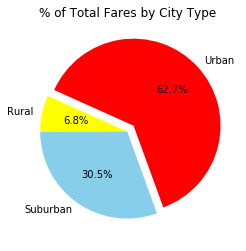

In [20]:
fares_by_type= plt.pie(pers, labels=labels, colors=colors, autopct="%1.1f%%", startangle = 290, explode =(0.1, 0,0))
plt.title("% of Total Fares by City Type")
plt.savefig("../Images/fares_by_city_type.png")

In [12]:
urban_rides= urban_num_rides.sum()
suburban_rides = suburban_num_rides.sum()
rural_rides = rural_num_rides.sum()

In [13]:
rides= [urban_rides, rural_rides, suburban_rides]

# Total Rides by City Type

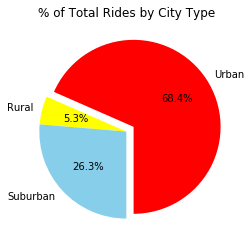

In [21]:
rides_by_city =plt.pie(rides, labels=labels, colors=colors, autopct="%1.1f%%", startangle = 270, explode =(0.1, 0,0))
plt.title("% of Total Rides by City Type")
plt.savefig("../Images/rides_by_city_type.png")

In [15]:
urban_driver_count = driver_count.sum()
suburban_driver_count = sub_driver_count.sum()
rural_driver_count = rural_driver_count.sum()

In [16]:
drivers = [urban_driver_count, rural_driver_count, suburban_driver_count]

# Total Drivers by City Type

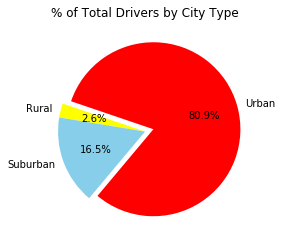

In [22]:
drivers_by_city = plt.pie(drivers, labels=labels, colors=colors, autopct="%1.1f%%", startangle = 230, explode =(0.1, 0,0) )
plt.title("% of Total Drivers by City Type")
plt.savefig("../Images/drivers_by_city_type.png")